# **Prediksi Customer Churn E-Commerce**
**Capstone Project (CP) Module 3 – Machine Learning**

---

**Nama:** Muhammad Arief Munazat  
**Program:** JCDSAH 024  
**Topik:** Supervised Learning – Binary Classification


---
# **Gambaran Umum Dataset**
---

1. **Dataset:** [`data_ecommerce_customer_churn.csv`](https://drive.google.com/drive/folders/19ySfIIod3bH_3SHXYgD9B0pe-eEIGP0a?usp=sharing)

2. **Konteks Bisnis (Busiiness Problem & Data Understanding):** 
Perusahaan e-commerce ingin ***memprediksi pelanggan yang berpotensi churn (berhenti berlangganan/membeli)*** agar dapat memberikan penawaran atau promosi yang sesuai untuk mempertahankan mereka.

3. **Fitur-Fitur Dataset:**

    | No. | Nama Fitur                  | Keterangan                                                                |
    |-----|-----------------------------|---------------------------------------------------------------------------|
    | 1   | Tenure                      | Lama menjadi pelanggan (dalam bulan/tahun).                               |
    | 2   | WarehouseToHome             | Jarak gudang ke rumah pelanggan.                                          |
    | 3   | NumberOfDeviceRegistered    | Jumlah perangkat yang terdaftar atas nama pelanggan.                      |
    | 4   | PreferedOrderCat            | Kategori pesanan favorit pelanggan dalam bulan terakhir.                  |
    | 5   | SatisfactionScore           | Skor kepuasan pelanggan terhadap layanan (skala numerik atau kategorik).  |
    | 6   | MaritalStatus               | Status pernikahan pelanggan.                                              |
    | 7   | NumberOfAddress             | Jumlah alamat yang tercatat untuk pelanggan.                              |
    | 8   | Complaint                   | Apakah ada komplain yang diajukan bulan lalu (ya/tidak).                  |
    | 9   | DaySinceLastOrder           | Hari sejak pesanan terakhir.                                              |
    | 10  | CashbackAmount              | Rata-rata cashback yang diterima bulan lalu.                              |
    | 11  | Churn                       | **Target variabel** – status churn (1 = churn, 0 = tidak churn).          |

    **Atribute Information Dari Dataset:**
    | Attribute Name           | Jenis Data (Statistik) | Jenis Data (ML) |
    | ------------------------ | ---------------------- | --------------- |
    | Tenure                   | Numerik (Diskrit)      | Numerical       |
    | WarehouseToHome          | Numerik (Diskrit)      | Numerical       |
    | NumberOfDeviceRegistered | Numerik (Diskrit)      | Numerical       |
    | PreferedOrderCat         | Kategorikal (Nominal)  | Categorical     |
    | SatisfactionScore        | Ordinal                | Ordinal         |
    | MaritalStatus            | Kategorikal (Nominal)  | Categorical     |
    | NumberOfAddress          | Numerik (Diskrit)      | Numerical       |
    | Complain                 | Biner                  | Binary          |
    | DaySinceLastOrder        | Numerik (Diskrit)      | Numerical       |
    | CashbackAmount           | Numerik (Kontinu)      | Numerical       |
    | Churn                    | Biner (Target)         | Label           |

    **Kategori Value:**
    - PreferOrderCat :
        - Laptop & Accessory
        - Mobile
        - Fashion
        - Others
        - Mobile Phone
        - Grocery
    - MaritalStatus :
        - Single
        - Married
        - Divorced

4. **Tujuan Analisis untuk CP 3 (Machine Learning) ini:**  
    - Membangun **model klasifikasi** untuk memprediksi churn pelanggan.  
    - Mengidentifikasi faktor-faktor paling berpengaruh terhadap churn.  
    - Memberikan rekomendasi strategi retensi berdasarkan insight dari model.

5. **Langkah Selanjutnya Yang Akan Dilakukan:**  
    - EDA (Exploratory Data Analysis) untuk memahami distribusi dan korelasi fitur.  
    - Preprocessing data.
    - Pemodelan dengan algoritma klasifikasi.  
    - Evaluasi model dan interpretasi hasil.
    - Business Recommendation

6. *Dataset ini sudah memiliki label/target (`Churn`), sehingga cocok untuk **supervised learning** dalam proyek **klasifikasi**, dengan definisi masalah & goal:*
    - **Target**: `Churn` (binary: 1 = Churn, 0 = Tidak Churn)
    - **Jenis model**: **Klasifikasi Biner Supervised Learning**
    - **Goal praktis**: Membangun model yang bisa **memprediksi kemungkinan churn** pelanggan berdasarkan fitur yang ada.

---
# **Exploratory Data Analysis**
---

## ***Load Dataset***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data_ecommerce_customer_churn.csv')

# Preview data
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## ***Data Overview***

In [2]:
# Data Overview
df.shape

(3941, 11)

**Interpretasi dari data overview:**
- Dataset memiliki 3.941 baris (observasi pelanggan)
- Terdiri dari 11 kolom (fitur/variabel)
- Artinya, setiap baris merepresentasikan 1 pelanggan e-commerce, dan setiap kolom adalah atribut perilaku atau karakteristik pelanggan.

In [3]:
# Data Structure & Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


**Interpretasi dari data structure & types:**

Tabel 1. Struktur Umum Dataset

| Aspek         | Keterangan              |
| ------------- | ----------------------- |
| Jumlah data   | 3.941 baris (pelanggan) |
| Jumlah kolom  | 11 fitur                |
| Ukuran data   | ±338.8 KB               |
| Jenis masalah | Klasifikasi (Churn)     |

Tabel 2. Tipe Data

| Tipe Data | Jumlah Kolom | Penjelasan           |
| --------- | ------------ | -------------------- |
| float64   | 4            | Data numerik kontinu |
| int64     | 5            | Data numerik diskrit |
| object    | 2            | Data kategorikal     |

Tabel 3. Missing Values

| Kolom             | Jumlah Missing |
| ----------------- | -------------- |
| Tenure            | 194            |
| WarehouseToHome   | 169            |
| DaySinceLastOrder | 213            |
| Kolom lain        | 0              |

Tabel 4. Klasifikasi Fitur

| Kategori             | Kolom                                                                                                                    |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| Numerical Features   | Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, DaySinceLastOrder, CashbackAmount |
| Categorical Features | PreferedOrderCat, MaritalStatus                                                                                          |
| Target Variable      | Churn (0 = tidak churn, 1 = churn)                                                                                       |

Tabel 5. Insight Awal untuk Modeling

| Aspek                  | Penjelasan                                                           |
| ---------------------- | -------------------------------------------------------------------- |
| Kesiapan data          | Cocok untuk supervised learning                                      |
| Isu utama              | Missing values pada beberapa kolom                                   |
| Tindakan preprocessing | Imputasi, encoding, scaling (opsional)                               |
| Model yang sesuai      | Logistic Regression, Decision Tree, Random Forest, Gradient Boosting |

In [4]:
# Check duplicate rows
df.duplicated().sum()

np.int64(671)

**Iterpretasi dari pengecekan duplicate rows:**
- Terdapat 671 baris duplikat dalam dataset.
- Baris-baris ini memiliki nilai yang sama persis di semua kolom dengan baris lain.
- Dari total 3.941 baris, 671 baris (~17%) adalah duplikat.

**Jika dibiarkan, akan memungkinkan:**
- Model bisa menjadi bias
- Pola tertentu bisa terlalu diperkuat
- Hasil evaluasi model bisa tidak akurat

In [5]:
# Drop duplicate rows
df = df.drop_duplicates()


**Itepretasi untuk tindakan drop dupclicate rows:** These duplicates were removed to prevent bias and ensure more reliable model performance.
- Mengidentifikasi baris-baris yang memiliki nilai sama persis di SEMUA kolom
- Menyimpan hanya satu baris pertama dari setiap kelompok duplikat dan menghapus baris duplikat lainnya

In [6]:
df.shape

(3270, 11)

## ***Missing Value Analysis***

In [7]:
# Check missing values
df.isnull().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

| Kolom             | Jumlah Missing | Interpretasi                                                     |
| ----------------- | -------------- | ---------------------------------------------------------------- |
| Tenure            | 160            | Sebagian kecil data masa berlangganan pelanggan tidak tercatat   |
| WarehouseToHome   | 135            | Informasi jarak gudang ke rumah pelanggan tidak lengkap          |
| DaySinceLastOrder | 181            | Tanggal pesanan terakhir tidak tersedia untuk sebagian pelanggan |
| Kolom lainnya     | 0              | Data lengkap tanpa nilai kosong                                  |


## ***Target Variable Analysis (Churn)***

In [8]:
# Count churn vs non-churn
print(df['Churn'].value_counts())

# Churn proportion
df['Churn'].value_counts(normalize=True)


Churn
0    2736
1     534
Name: count, dtype: int64


Churn
0    0.836697
1    0.163303
Name: proportion, dtype: float64

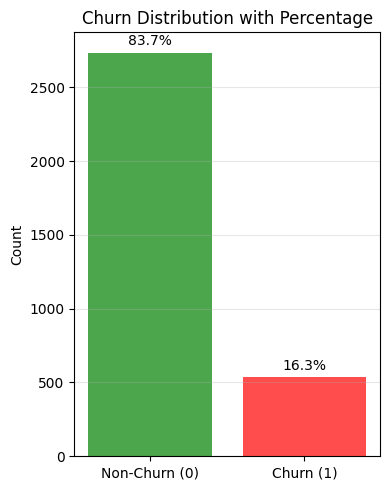

In [9]:
# Visualization dengan pin point percentage dan series churn tegak lurus
plt.figure(figsize=(4, 5))

# Hitung value counts dan persentase
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

# Bar chart tegak lurus
bars = plt.bar(['Non-Churn (0)', 'Churn (1)'], 
               churn_counts.values,
               color=['green', 'red'],
               alpha=0.7)

# Pin point percentage
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + max(churn_counts.values)*0.01,
             f'{churn_percentage[i]:.1f}%',
             ha='center',
             va='bottom',
             fontsize=10)

plt.title("Churn Distribution with Percentage")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretasi:**
- Non-Churn yang mana mengindikasikan customer loyal/aktif (0) adalah 2736 (83.7%)
- Churn yang mengindikasikan customer tidak melakukan transaksi lagi (1) adalah 534 (16.3%)
- Artinya sebagian besar customer tetap aktif

## ***Descriptive Statistic (Numerical)***

In [10]:
df.describe()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3135.000000,3270.000000,3270.000000,3270.000000,3270.000000,3089.000000,3270.000000,3270.000000
mean,10.190354,15.510367,3.676453,3.020795,4.222936,0.281651,4.545484,177.417670,0.163303
std,8.650821,8.568382,1.017390,1.395113,2.623195,0.449873,3.696022,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.885000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


**Intepretasi hasil analisa statistik dataset**

| Variabel                 | Ringkasan Statistik Utama                                                                 | Interpretasi                                                                                                                                 |
| ------------------------ | ----------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| Tenure                   | Mean ≈ 10.19, Median = 9, Min–Max = 0–61, Std = 8.65, Missing: 160                       | Mayoritas pelanggan masih relatif baru, namun terdapat variasi masa berlangganan yang besar dan adanya missing data                          |
| WarehouseToHome          | Mean ≈ 15.51, Median = 13, Max = 127, Missing: 135                                       | Distribusi cenderung miring ke kanan, terdapat jarak yang sangat jauh (potensi outlier ekstrem) dan missing data                             |
| NumberOfDeviceRegistered | Mean ≈ 3.68, Median = 4, Rentang = 1–6                                                   | Sebagian besar pelanggan menggunakan 3–4 perangkat, distribusi cukup normal                                                                  |
| SatisfactionScore        | Mean ≈ 3.02, Median = 3, Skala 1–5                                                       | Tingkat kepuasan pelanggan berada pada level sedang/netral                                                                                   |
| NumberOfAddress          | Mean ≈ 4.22, Median = 3, Max = 22                                                        | Terdapat pelanggan dengan jumlah alamat sangat banyak (potensi outlier ekstrem)                                                              |
| Complain                 | Mean ≈ 0.28, Median = 0, 75% = 1                                                         | Hampir 30% pelanggan pernah mengajukan komplain (angka yang tinggi untuk bisnis)                                                            |
| DaySinceLastOrder        | Mean ≈ 4.55, Median = 3, Max = 46, Missing: 181                                          | Sebagian besar pelanggan baru bertransaksi, namun ada yang sudah lama tidak aktif dan adanya missing data                                    |
| CashbackAmount           | Mean ≈ 177.42, Median ≈ 163.89, Max ≈ 324.99                                             | Nilai cashback bervariasi cukup besar antar pelanggan, beberapa mendapatkan 0 cashback                                                       |
| Churn                    | Mean ≈ 0.163 (16.3%), Median = 0                                                         | Proporsi pelanggan churn relatif kecil, dataset sangat tidak seimbang (imbalance class)                                                      |

---

**Catatan Tambahan & Rekomendasi**

**🔴 Masalah Data Kritis**
1. **Missing Values** 
   - Tenure (4.9% missing), WarehouseToHome (4.1% missing), DaySinceLastOrder (5.5% missing)
   - *Rekomendasi: Median imputation*

2. **Outlier Ekstrem**
   - WarehouseToHome (max 127 km) - tidak realistis untuk pengiriman e-commerce
   - NumberOfAddress (max 22 alamat) - jumlah tidak wajar
   - *Rekomendasi: Capping values (contoh: max 50km untuk jarak, max 10 untuk alamat), atau bisa tidak di gunakan (Optional)*

3. **Class Imbalance Parah**
   - Churn rate 16.3% vs Non-churn 83.7%
   - *Rekomendasi: SMOTE, class_weight='balanced', atau undersampling*

**🟡 Potensi Masalah Bisnis**
1. **Tingkat Komplain Tinggi** (28%)
   - Hampir 1 dari 3 pelanggan pernah complain
   - Indikator potensi masalah layanan/kualitas produk

2. **Kepuasan Pelanggan Medioker** (3.02/5)
   - Skor netral menunjukkan ruang perbaikan signifikan

3. **Churn Rate Signifikan** (16.3%)
   - Kehilangan 1 dari 6 pelanggan mengindikasikan masalah retensi

**🟢 Aspek Positif**
1. **Aktivitas Pelanggan Baik**
   - Rata-rata 4.55 hari sejak order terakhir menunjukkan frekuensi transaksi tinggi
   - Rata-rata 3.68 device terdaftar menunjukkan engagement multidevice

2. **Cashback Program Berjalan**
   - Variasi cashback menunjukkan program yang aktif dan terdiferensiasi

**Preprocessing untuk Machine Learning**

| Langkah | Variabel Terdampak | Teknik | Alasan |
|---------|-------------------|--------|--------|
| **Missing Value Handling** | Tenure, WarehouseToHome, DaySinceLastOrder | Median & Mode Imputation | Menjaga distribusi, robust terhadap outlier |
| **Outlier Treatment** | WarehouseToHome, NumberOfAddress | Winsorization/Capping | Mengurangi pengaruh nilai ekstrem |
| **Class Balancing** | Churn | SMOTE atau class_weight | Mengatasi imbalance class (16.3% vs 83.7%) |
| **Feature Scaling** | CashbackAmount, Tenure | StandardScaler | Menyamakan skala untuk algoritma sensitif skala |
| **Feature Engineering** | DaySinceLastOrder, SatisfactionScore | Binning/Encoding | Ekstraksi informasi lebih baik |

**Metrik Evaluasi yang Direkomendasikan**
- **Accuracy**
- **Precision, Recall, F1-Score** (khususnya untuk kelas Churn=1)
- **ROC-AUC Score**
- **Confusion Matrix Analysis**
- **Precision-Recall Curve**

> **Kesimpulan**: Dataset memiliki kualitas data yang cukup baik namun memerlukan preprocessing khusus untuk missing values, outliers, dan class imbalance sebelum dapat digunakan untuk pemodelan machine learning yang efektif.

## ***Handle Missing Value***

**Strategi yang digunakan**
- Numerik → median (lebih robust terhadap outlier)
- Kategorikal → mode

In [11]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [12]:
# Untuk numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
median_values = df[numeric_cols].median()
df[numeric_cols] = df[numeric_cols].fillna(median_values)

# Untuk categorical columns  
categorical_cols = df.select_dtypes(include=['object']).columns
mode_values = df[categorical_cols].mode().iloc[0]
df[categorical_cols] = df[categorical_cols].fillna(mode_values)

# Re-check missing values
df.isnull().sum()


/var/folders/rr/gn9dysc94sxdcl0fm7pg14z00000gn/T/ipykernel_4399/839705563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(median_values)
/var/folders/rr/gn9dysc94sxdcl0fm7pg14z00000gn/T/ipykernel_4399/839705563.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].fillna(mode_values)


Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

In [13]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


# **Itepretasi Hasil handle Missing Value**

| Kolom | Tipe Data | Missing Sebelum | Missing Sesudah | Status |
|-------|-----------|-----------------|-----------------|--------|
| Tenure | Numerik | Ada (160) | 0 | SUCCESS - Median imputation |
| WarehouseToHome | Numerik | Ada (135) | 0 | SUCCESS - Median imputation |
| NumberOfDeviceRegistered | Numerik | 0 | 0 | Already complete |
| PreferedOrderCat | Kategorikal | 0 | 0 | Already complete |
| SatisfactionScore | Numerik (Ordinal) | 0 | 0 | Already complete |
| MaritalStatus | Kategorikal | 0 | 0 | Already complete |
| NumberOfAddress | Numerik | 0 | 0 | Already complete |
| Complain | Binary (0/1) | 0 | 0 | Already complete |
| DaySinceLastOrder | Numerik | Ada (181) | 0 | SUCCESS - Median imputation |
| CashbackAmount | Numerik | 0 | 0 | Already complete |
| Churn | Binary (Target) | 0 | 0 | Already complete |

**Total Baris Data:** 3270

**Missing Values Sebelum Imputasi:**
- Tenure: 160 missing (4.9%)
- WarehouseToHome: 135 missing (4.1%)
- DaySinceLastOrder: 181 missing (5.5%)
- **Total:** 476 missing values (14.6% dari total observasi tersebar)

**Missing Values Setelah Imputasi:**
- Semua kolom: 0 missing values
- Retention Data: 100% (semua 3270 baris tetap digunakan)
- Median imputation untuk ketiga variabel numerik (Tenure, WarehouseToHome, DaySinceLastOrder)
- Tidak diperlukan imputasi untuk variabel kategorikal karena sudah lengkap
- Target variable (Churn) sudah lengkap - kondisi ideal untuk modeling

## ***Univariate Analysis***

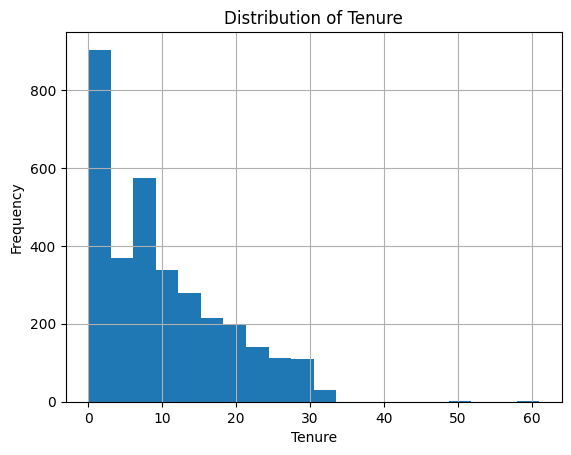

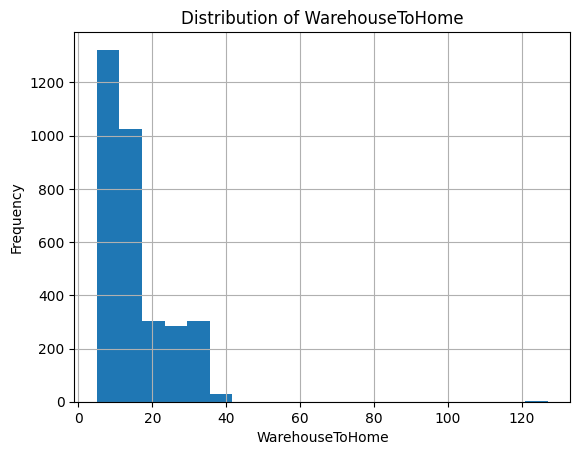

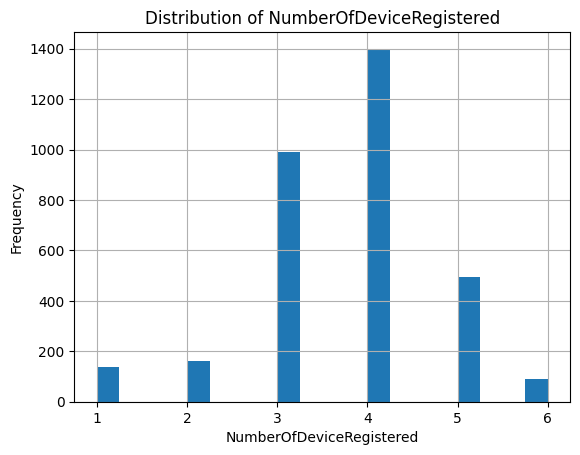

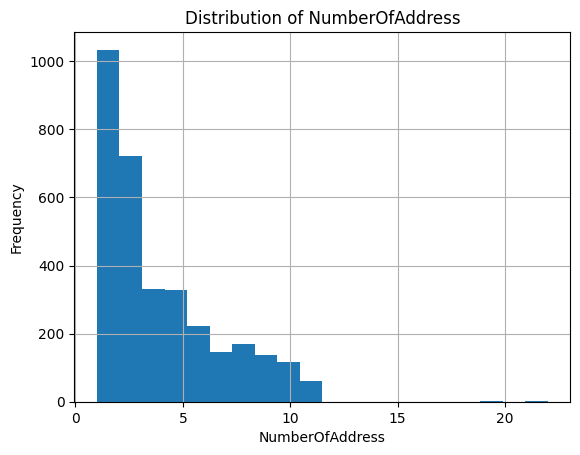

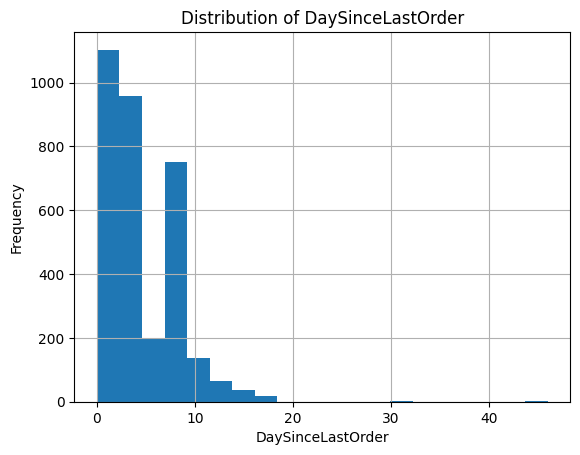

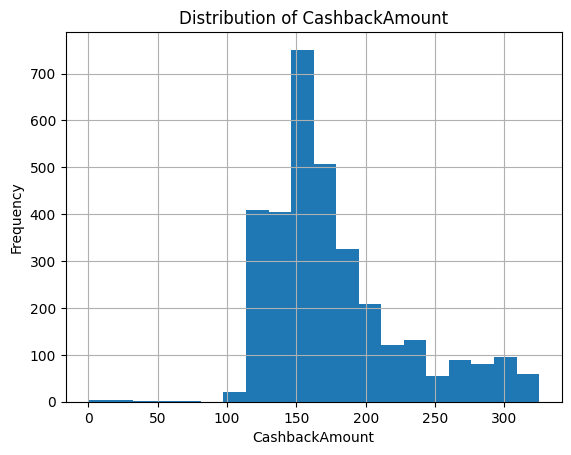

In [14]:
# Numerical Features
num_cols = [
    'Tenure',
    'WarehouseToHome',
    'NumberOfDeviceRegistered',
    'NumberOfAddress',
    'DaySinceLastOrder',
    'CashbackAmount'
]

for col in num_cols:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [15]:
# Categorical & Ordinal Features
cat_cols = [
    'PreferedOrderCat',
    'MaritalStatus',
    'SatisfactionScore',
    'Complain'
]

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                241
Others                 149
Name: count, dtype: int64

Value counts for MaritalStatus:
MaritalStatus
Married     1686
Single      1008
Divorced     576
Name: count, dtype: int64

Value counts for SatisfactionScore:
SatisfactionScore
3    932
1    707
5    635
4    604
2    392
Name: count, dtype: int64

Value counts for Complain:
Complain
0    2349
1     921
Name: count, dtype: int64


## ***Bivariate Analysis (Features & Churn)***

In [16]:
# Numerical vs Churn
df.groupby('Churn')[num_cols].mean()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,NumberOfAddress,DaySinceLastOrder,CashbackAmount
Churn,,,,,,
0,11.386330,15.163377,3.627193,4.169225,4.688231,180.717007
1,3.705993,16.653558,3.928839,4.498127,3.290262,160.513202


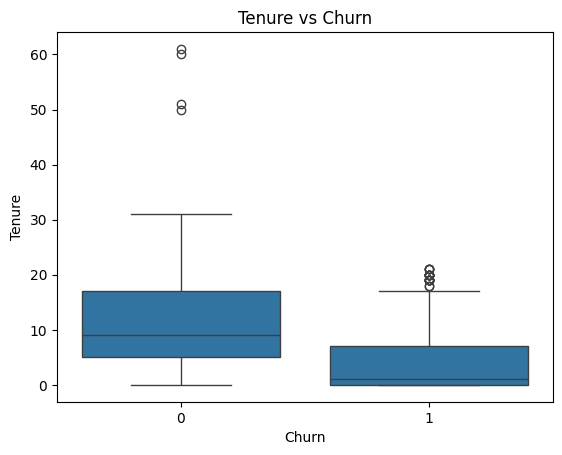

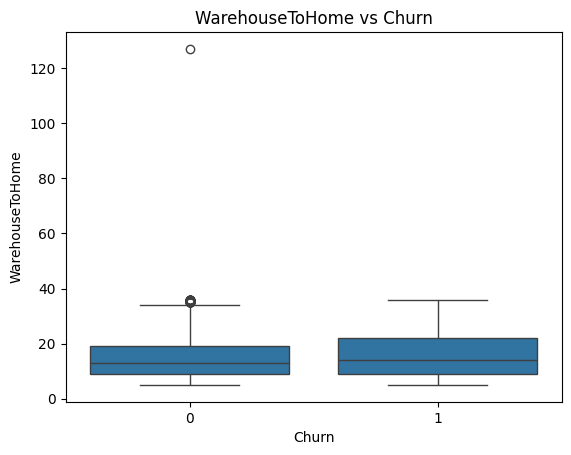

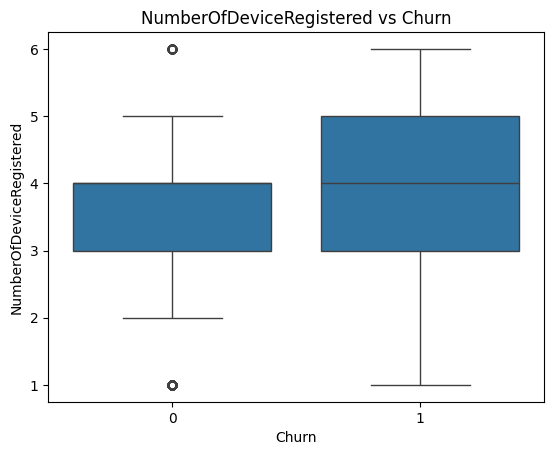

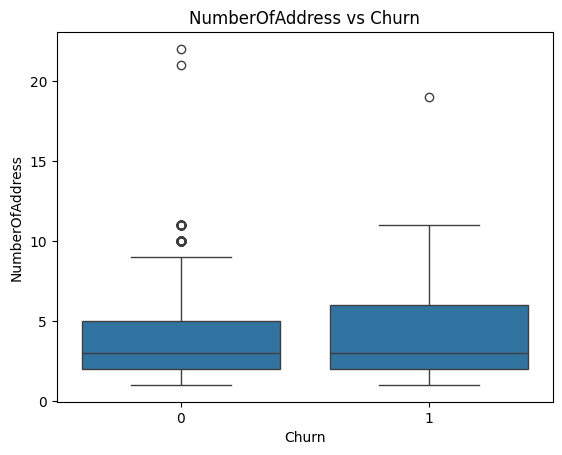

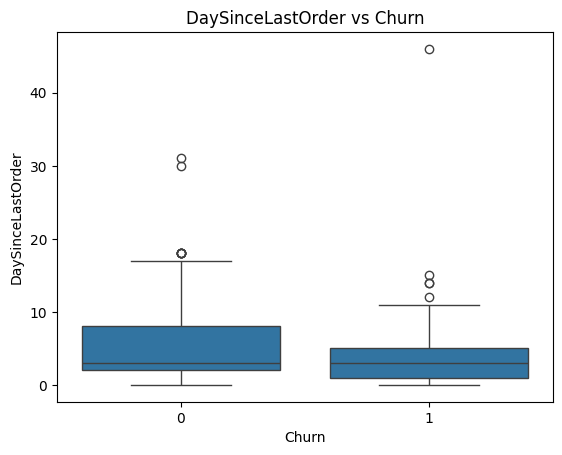

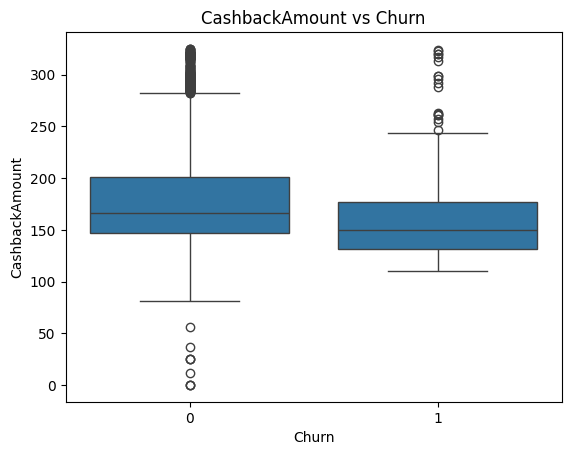

In [17]:
# Boxplot for numerical vs churn
for col in num_cols:
    plt.figure()
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


In [18]:
# Categorical vs Churn (PreferedOrderCat)
pd.crosstab(
    df['PreferedOrderCat'],
    df['Churn'],
    normalize='index')


Churn,0,1
PreferedOrderCat,,
Fashion,0.845041,0.154959
Grocery,0.958506,0.041494
Laptop & Accessory,0.901896,0.098104
Mobile,0.729258,0.270742
Mobile Phone,0.731034,0.268966
Others,0.926174,0.073826


In [19]:
# Categorical vs Churn (MaritalStatus)
pd.crosstab(
    df['MaritalStatus'],
    df['Churn'],
    normalize='index')


Churn,0,1
MaritalStatus,,
Divorced,0.845486,0.154514
Married,0.890866,0.109134
Single,0.741071,0.258929


In [20]:
# Categorical vs Churn (SatisfactionScore)
pd.crosstab(
    df['SatisfactionScore'],
    df['Churn'],
    normalize='index'
).sort_index()


Churn,0,1
SatisfactionScore,,
1,0.888260,0.111740
2,0.869898,0.130102
3,0.825107,0.174893
4,0.841060,0.158940
5,0.771654,0.228346


In [21]:
# Categorical vs Churn (Complain)
pd.crosstab(
    df['Complain'],
    df['Churn'],
    normalize='index')


Churn,0,1
Complain,,
0,0.897403,0.102597
1,0.681868,0.318132


## ***Correlation Analysis (Numerical Only)***

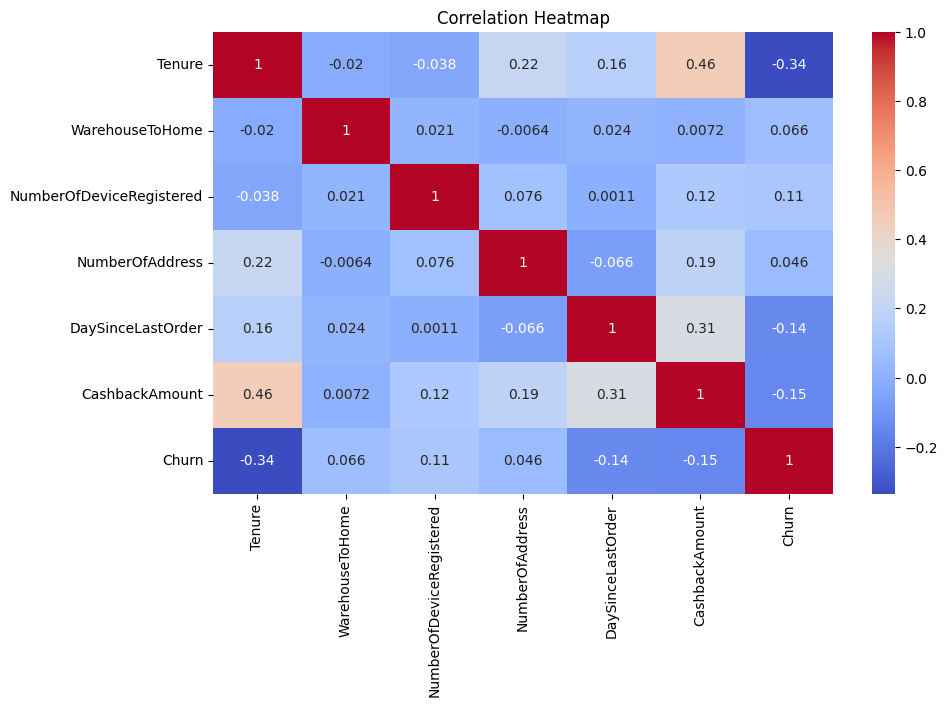

In [22]:
corr_matrix = df[num_cols + ['Churn']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Fokus:**
- Tenure ↔ DaySinceLastOrder
- CashbackAmount ↔ Churn
- Multicollinearity risk

**Intepretasi**
* **Tenure ↔ DaySinceLastOrder**
  → Customer yang sudah lama bergabung biasanya **lebih sering order**
  → Artinya: **semakin lama tenure, semakin kecil hari sejak order terakhir**
* **CashbackAmount ↔ Churn**
  → Cashback adalah **insentif**
  → Cashback lebih besar → customer **lebih bertahan** → churn lebih kecil
* **Multicollinearity Risk**
  → Beberapa fitur bisa **mengandung informasi yang sama**
  → Bisa bikin **model linear bingung** menentukan pengaruh sebenarnya

**Tabel Ringkasan EDA Focus**

| Fokus Analisis             | Apa yang Dicek              | Makna Sederhana           | Dampak ke Model            |
| -------------------------- | --------------------------- | ------------------------- | -------------------------- |
| Tenure ↔ DaySinceLastOrder | Korelasi antar fitur        | Customer lama lebih aktif | Risiko fitur redundant     |
| CashbackAmount ↔ Churn     | Hubungan fitur–target       | Cashback menurunkan churn | Penting untuk prediksi     |
| Multicollinearity          | Korelasi tinggi antar fitur | Informasi tumpang tindih  | Bermasalah di model linear |

**Tabel Insight Bisnis**

| Temuan                  | Interpretasi Bisnis | Aksi yang Bisa Diambil |
| ----------------------- | ------------------- | ---------------------- |
| Tenure tinggi → aktif   | Customer loyal      | Program loyalty        |
| Cashback rendah → churn | Insentif kurang     | Tambah promo personal  |
| Fitur saling mirip      | Overlapping info    | Seleksi fitur          |


> EDA menunjukkan bahwa tenure memiliki hubungan negatif dengan hari sejak order terakhir, menandakan customer lama lebih aktif. Cashback amount berhubungan negatif dengan churn, sehingga berpotensi digunakan sebagai strategi retensi. Ditemukan potensi multicollinearity pada beberapa fitur numerik yang perlu diperhatikan pada pemodelan linear.


## ***EDA Summary***

In [23]:
eda_summary = {
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1],
    "Churn Rate": df['Churn'].mean()
}

eda_summary


{'Total Rows': 3270,
 'Total Columns': 11,
 'Churn Rate': np.float64(0.163302752293578)}

**Ringkasan EDA – Customer Churn E-commerce**

**1. Gambaran Umum Dataset**

* Total observasi (pelanggan): **3.270**
* Total variabel (fitur + target): **11**

> Ukuran dataset ini sudah **cukup memadai** untuk melakukan analisis eksploratif dan pemodelan klasifikasi.

**2. Kualitas Data – Missing Values**

Ditemukan nilai yang hilang (missing values) pada beberapa fitur berikut:

| Fitur             | Jumlah Data Hilang | Interpretasi Bisnis                             |
| ----------------- | ------------------ | ----------------------------------------------- |
| Tenure            | 160                | Lama pelanggan bergabung tidak tercatat         |
| WarehouseToHome   | 135                | Jarak gudang ke rumah pelanggan tidak diketahui |
| DaySinceLastOrder | 181                | Aktivitas terakhir pelanggan tidak tercatat     |

> Fitur lainnya **tidak memiliki missing values**.

**Implikasi:**
Missing values telah ditangani pada tahap ini.

**3. Variabel Target (Churn)**

* Tingkat churn: **16,3%**
* Non-churn: **83,7%**

**Interpretasi:**

* Dataset bersifat **imbalanced ringan**
* Churn bukan kelas mayoritas, namun tetap merupakan **masalah bisnis yang signifikan**

**Implikasi untuk Pemodelan:**

* Akurasi saja **tidak cukup** sebagai metrik evaluasi
* Metrik seperti **Recall** dan **F1-score** lebih relevan untuk digunakan

**4. Temuan Utama**

* Dataset terdiri dari kombinasi fitur **numerik, kategorikal, ordinal, dan biner**
* Faktor **ketidakaktifan pelanggan**, **pengalaman layanan**, dan **insentif (cashback)** diperkirakan menjadi pendorong utama churn
* Permasalahan kualitas data masih **dapat ditangani** dan tidak menghambat analisis lanjutan

**5. Kesimpulan EDA**

Dataset ini **layak digunakan** untuk pemodelan prediksi churn.
Hasil EDA menunjukkan adanya missing data yang masih dapat dikelola serta tingkat churn yang bermakna, sehingga memberikan dasar yang kuat untuk tahap preprocessing, feature engineering, dan pemodelan prediktif.

---

**Langkah Selanjutnya**

* Preprocessing data (imputasi, encoding, scaling)
* Feature engineering
* Pelatihan dan evaluasi model

---
# **Preprocessing Data (Encoding, Scalling, Feature & Target Separation)**
---

In [24]:
# Import Library

import pandas as pd
import numpy as np

# Visualization (optional, but useful later)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3270 non-null   float64
 1   WarehouseToHome           3270 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3270 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.6+ KB


## ***Encode Categorical Variable***
Karena ini **Classification** problem, maka perlu mengubah data kategorikal menjadi numeric.

In [26]:
# Label Encoding untuk tree-based & baseline models
label_encoders = {}

# Kolom yang akan di-encode
cols_to_encode = ['MaritalStatus', 'PreferedOrderCat']

for col in cols_to_encode:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [27]:
for col, le in label_encoders.items():
    print(f"\nMapping untuk {col}:")
    for i, category in enumerate(le.classes_):
        print(f"{category} → {i}")



Mapping untuk MaritalStatus:
Divorced → 0
Married → 1
Single → 2

Mapping untuk PreferedOrderCat:
Fashion → 0
Grocery → 1
Laptop & Accessory → 2
Mobile → 3
Mobile Phone → 4
Others → 5


In [28]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,2,3,2,2,0,7.0,143.32,0
1,7.0,25.0,4,3,1,1,2,0,7.0,129.29,0
2,27.0,13.0,3,2,1,1,5,0,7.0,168.54,0
3,20.0,25.0,4,0,3,0,7,0,3.0,230.27,0
4,30.0,15.0,4,5,4,2,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,0,4,1,7,0,8.0,249.90,0
3935,26.0,7.0,4,1,1,1,4,0,9.0,295.99,0
3936,28.0,9.0,5,0,3,1,8,0,1.0,231.86,0
3937,8.0,7.0,2,4,2,2,4,0,4.0,157.80,0


| Kolom               | Makna Encoding                                                              |
| ------------------- | --------------------------------------------------------------------------- |
| `PreferedOrderCat`  | Kategori produk favorit pelanggan (misalnya: Mobile, Laptop, Grocery, dll.) |
| `MaritalStatus`     | Status pernikahan pelanggan (Single, Maried Divorced)                                                 |





## ***Feature & Target Sparation***

In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [30]:
X.shape, y.shape


((3270, 10), (3270,))

***Itepretasi:***
1. X.shape = (3270, 10)
- 3270 → jumlah observasi / baris data (customer)
- 10 → jumlah fitur (variabel independen) yang digunakan sebagai input model
- Artinya: Setiap customer direpresentasikan oleh 8 fitur untuk memprediksi churn.

2. y.shape = (3270,)
- 3270 → jumlah nilai target
- Bentuk (3270,) berarti 1 dimensi (vector)
- Artinya: Setiap customer memiliki 1 label target, yaitu status churn (0 atau 1).

In [31]:
# Feature Scaling (Logistic Regression, KNN, SVM)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [32]:
# Train-test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)


In [33]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2616, 10)
Testing set shape: (654, 10)


**Interpretasi:**
1. Training Set → (2616, 10)
- 2616 data digunakan untuk melatih model
- 8 fitur sebagai variabel prediktor

2. Testing Set → (654, 10)
- 654 data digunakan untuk evaluasi model
- 8 fitur yang sama dengan training set

Karena total data = 3270
- Rasio split = 80% train : 20% test

Perhitungan:
- 80% × 3270 = 2616
- 20% × 3270 = 654

---
# **Modelling & Evaluation**
---

Tujuan :
- Menangani imbalance dengan SMOTE
- Melatih Random Forest dan Gradient Boosting
- Hyperparameter tuning dengan GridSearchCV
- Evaluasi dengan Accuracy, Precision, Recall, F1, dan Confusion Matrix
- Visualisasi dan interpretasi feature importance
- Mengetahui fitur paling berpengaruh
- Menyimpan final model
- Eksperimen dengan **Ensemble** atau **Threshold Tuning** untuk meningkatkan recall (OPTIONAL)

In [38]:
# Librray Import
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # untuk handling imbalance
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
# Data Preparation
X = df.drop(columns=['Churn'])
y = df['Churn']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [40]:
# Handling Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Churn
0    2189
1     427
Name: count, dtype: int64
After SMOTE: Churn
0    2189
1    2189
Name: count, dtype: int64


/Users/muhammada.munazat/Documents/Purwadhika_bue/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


**Interpretasi:**
1. Sebelum SMOTE
- Class 0 (tidak churn) jauh lebih banyak daripada class 1 (churn).
- Ini imbalanced dataset, yang membuat model cenderung mem-prediksi mayoritas class saja → recall untuk churn rendah.
2. Setelah SMOTE
- Class 1 (churn) sudah di-oversampling sehingga jumlahnya sama dengan class 0.
- Model sekarang bisa belajar lebih baik untuk mengenali churners.
- Ini biasanya meningkatkan recall dan F1 score untuk class minoritas.

## ***Model Training & Hyperparameter Tuning***
Random Forest & Gradient Boosting

In [41]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train_res, y_train_res)

best_rf = grid_rf.best_estimator_
print("Best RF params:", grid_rf.best_params_)


Best RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


| Parameter           | Nilai | Explanation                                                 |
| ------------------- | ----- | ----------------------------------------------------------- |
| `n_estimators`      | 100   | Jumlah pohon di forest                                      |
| `max_depth`         | None  | Pohon tumbuh sampai semua daun murni (tidak dibatasi depth) |
| `min_samples_split` | 2     | Minimal sampel untuk membagi node                           |
| `min_samples_leaf`  | 1     | Minimal sampel di daun                                      |

**Interpretasi:**
- Random Forest kamu fiturnya cukup kompleks, karena max_depth=None, artinya setiap pohon bisa sepenuhnya belajar pola dari data train yang sudah di-SMOTE.
- Kombinasi ini biasanya memberikan performa tinggi pada data test, tapi hati-hati terhadap overfitting → bisa cek train vs test accuracy/F1.
- n_estimators=100 sudah cukup untuk stabil, bisa ditambah ke 200 atau 300 jika ingin hasil lebih stabil.

In [42]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=5, scoring='f1')
grid_gb.fit(X_train_res, y_train_res)

best_gb = grid_gb.best_estimator_
print("Best GB params:", grid_gb.best_params_)


Best GB params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


| Parameter           | Nilai | Explanation                                                   |
| ------------------- | ----- | ------------------------------------------------------------- |
| `n_estimators`      | 100   | Jumlah pohon (trees) yang dibuat                              |
| `learning_rate`     | 0.1   | Seberapa besar setiap pohon mempengaruhi prediksi (step size) |
| `max_depth`         | 5     | Kedalaman maksimum tiap pohon (kontrol kompleksitas)          |
| `min_samples_split` | 5     | Minimal sampel untuk membagi node                             |
| `min_samples_leaf`  | 1     | Minimal sampel di daun                                        |

**Interpretasi:**
- Gradient Boosting lebih terkendali dibanding Random Forest karena depth dibatasi (max_depth=5) dan learning_rate=0.1 → mengurangi risiko overfitting.
- Kombinasi ini biasanya memberikan performa F1 yang baik sekaligus generalisasi lebih baik ke data test.
- n_estimators=100 cukup standar, bisa ditingkatkan jika ingin performa lebih stabil tapi butuh waktu training lebih lama.

## ***Predict & Evaluasi***
Confusion Matrix & Performance Metrics

===== Random Forest =====
Accuracy: 0.926605504587156
Precision: 0.7657657657657657
Recall: 0.794392523364486
F1 Score: 0.7798165137614679

Confusion Matrix:


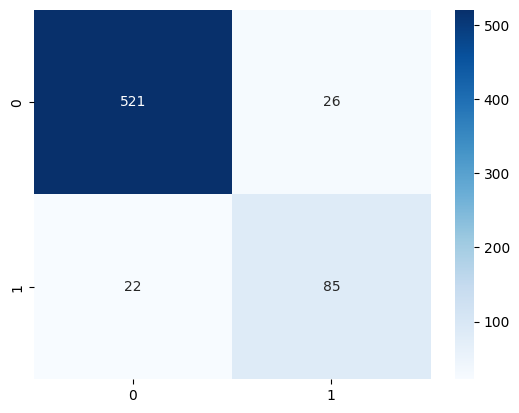

===== Gradient Boosting =====
Accuracy: 0.9036697247706422
Precision: 0.6964285714285714
Recall: 0.7289719626168224
F1 Score: 0.7123287671232876

Confusion Matrix:


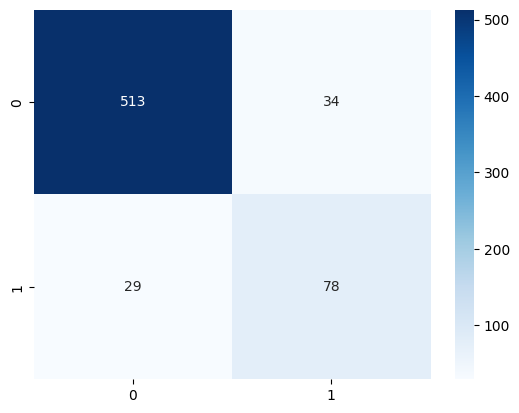

In [44]:
models = {"Random Forest": best_rf, "Gradient Boosting": best_gb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    


Hasil evaluasi **Random Forest** dan **Gradient Boosting** :

| Model             | Accuracy | Precision | Recall | F1 Score |
| ----------------- | -------- | --------- | ------ | -------- |
| Random Forest     | 0.927    | 0.766     | 0.794  | 0.780    |
| Gradient Boosting | 0.904    | 0.696     | 0.729  | 0.712    |

**Random Forest**
- Accuracy: 0.927 → model benar memprediksi ~92,7% kasus
- Precision: 0.766 → dari semua prediksi churn, ~76,6% benar-benar churn
- Recall: 0.794 → dari semua customer yang benar-benar churn, model berhasil mendeteksi ~79,4%
- F1 Score: 0.780 → kombinasi precision & recall, ini cukup tinggi → model cukup seimbang untuk prediksi churn
- Kesimpulan: Random Forest paling kuat di antara dua model, baik dalam mendeteksi churners maupun meminimalkan false positives.

**Gradient Boosting**
- Accuracy: 0.904 → sedikit lebih rendah dari RF
- Precision: 0.696 → lebih banyak false positives dibanding RF
- Recall: 0.729 → sedikit lebih rendah dalam mendeteksi churners
- F1 Score: 0.712 → lebih rendah dibanding RF
- Kesimpulan: Gradient Boosting performa baik tapi kurang dibanding Random Forest untuk dataset ini. Lebih konservatif dalam prediksi, mungkin karena depth terbatas (max_depth=5) dan learning rate=0.1.

**Interpretasi:**
* **Random Forest** unggul di semua metrik → lebih baik untuk memprediksi churners.
* **Gradient Boosting** cukup baik tapi sedikit lebih konservatif → lebih banyak false positives dan sedikit lebih rendah recall.

## ***Feature Importance***

===== Random Forest Feature Importance =====
                    Feature  Importance
0                    Tenure    0.289879
9            CashbackAmount    0.107947
8         DaySinceLastOrder    0.088770
3          PreferedOrderCat    0.083372
1           WarehouseToHome    0.082596
6           NumberOfAddress    0.082089
4         SatisfactionScore    0.079151
7                  Complain    0.078252
2  NumberOfDeviceRegistered    0.055654
5             MaritalStatus    0.052288


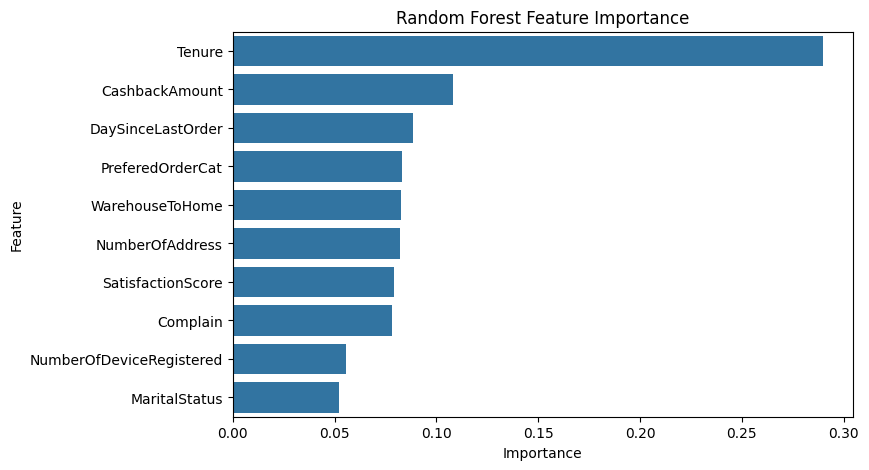

===== Gradient Boosting Feature Importance =====
                    Feature  Importance
0                    Tenure    0.422332
6           NumberOfAddress    0.087397
7                  Complain    0.078704
3          PreferedOrderCat    0.075652
4         SatisfactionScore    0.072318
9            CashbackAmount    0.071244
8         DaySinceLastOrder    0.058511
5             MaritalStatus    0.048776
1           WarehouseToHome    0.042793
2  NumberOfDeviceRegistered    0.042271


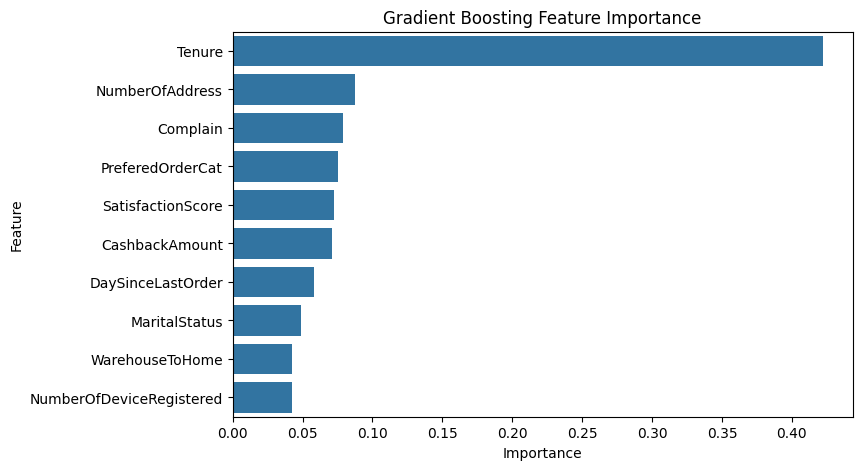

In [45]:
for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        fi = pd.DataFrame({
            "Feature": X.columns,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)
        
        print(f"===== {name} Feature Importance =====")
        print(fi)
        
        # Visualisasi
        plt.figure(figsize=(8,5))
        sns.barplot(x="Importance", y="Feature", data=fi)
        plt.title(f"{name} Feature Importance")
        plt.show()

**Interpretasi** *feature importance* dari Random Forest (RF) dan Gradient Boosting (GB):

| Feature                  | RF Importance | GB Importance |
| ------------------------ | ------------- | ------------- |
| Tenure                   | 0.290         | 0.422         |
| CashbackAmount           | 0.108         | 0.071         |
| DaySinceLastOrder        | 0.089         | 0.059         |
| PreferedOrderCat         | 0.083         | 0.076         |
| SatisfactionScore        | 0.079         | 0.072         |
| MaritalStatus            | 0.052         | 0.049         |
| NumberOfAddress          | 0.082         | 0.087         |
| Complain                 | 0.078         | 0.079         |
| NumberOfDeviceRegistered | 0.056         | 0.042         |
| WarehouseToHome          | 0.083         | 0.043         |

**Insight dari Feature Importance:**
1. **Tenure** paling berpengaruh di kedua model → lama menjadi customer sangat mempengaruhi churn.
2. **Random Forest** menekankan **CashbackAmount** dan **DaySinceLastOrder**, sedangkan **Gradient Boosting** lebih menekankan **Tenure** dan **NumberOfAddress**.
3. Fitur lain seperti **SatisfactionScore, Complain, PreferedOrderCat** juga cukup penting → bisa jadi fokus strategi retensi.
4. Fitur dengan importance rendah (MaritalStatus, NumberOfDeviceRegistered, WarehouseToHome) bisa dipertimbangkan untuk **dimensionality reduction** jika ingin simplifikasi model.

In [48]:
import pickle

# Pilih model terbaik berdasarkan F1 / Recall → Random Forest
final_model = best_rf

# Save model
with open("final_random_forest_churn.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Final model saved as 'final_random_forest_churn.pkl'")

# Load model (opsional)
# with open("final_random_forest_churn.pkl", "rb") as f:
#     loaded_model = pickle.load(f)


Final model saved as 'final_random_forest_churn.pkl'


### *Voting Ensemble*

In [49]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[('rf', best_rf), ('gb', best_gb)],
    voting='soft'  # probabilitas → lebih fleksibel untuk threshold
)
ensemble_model.fit(X_train_res, y_train_res)

y_pred_ens = ensemble_model.predict(X_test)

print("Ensemble F1 Score:", f1_score(y_test, y_pred_ens))


Ensemble F1 Score: 0.7545454545454545


**Interpretasi dari Voting Ensemble:**

Hasil Ensemble F1 Score = 0.755

1. Perbandingan dengan model tunggal

    | Model             | F1 Score |
    | ----------------- | -------- |
    | Random Forest     | 0.780    |
    | Gradient Boosting | 0.712    |
    | Ensemble (RF+GB)  | 0.755    |

    - F1 score ensemble **lebih tinggi dari Gradient Boosting** tapi sedikit **lebih rendah dari Random Forest**.
    - Ini artinya **ensemble tidak selalu lebih baik** dari model terbaik tunggal, tapi kadang **lebih stabil** terutama jika model berbeda performanya di subset data.

2. Mengapa F1 Score ensemble lebih rendah dari RF?
    - Random Forest sendiri sudah sangat kuat untuk dataset ini → menambahkan Gradient Boosting yang lebih konservatif (recall lebih rendah) **menarik rata-rata probabilitas ke bawah** → sedikit menurunkan F1.
    - Tapi keuntungan ensemble:
      - Bisa **mengurangi overfitting** jika model tunggal terlalu spesifik
      - Lebih **stabil** jika data baru berubah sedikit

3. Insight Bisnis
    - Untuk dataset ini, **Random Forest saja sudah cukup** sebagai model final.
    - Ensemble bisa dicoba di **dataset lain atau lebih besar** untuk mengecek stabilitas prediksi.

### *Threshold Tuning (untuk lebih banyak mendeteksi Churners)*

In [50]:
y_proba = final_model.predict_proba(X_test)[:,1]  # probabilitas class 1
threshold = 0.4  # default biasanya 0.5, bisa diturunkan
y_pred_thresh = (y_proba >= threshold).astype(int)

print("Threshold-tuned F1 Score:", f1_score(y_test, y_pred_thresh))


Threshold-tuned F1 Score: 0.792


**Interpretasi dari Threshold Tuning:**

**Yang terjadi**
- Default threshold untuk prediksi class 1 (churn) biasanya 0.5.
- Dengan menurunkan threshold menjadi 0.4, artinya:
    - Jika probabilitas churn ≥ 0.4 → prediksi churn
    - Lebih agresif dalam mendeteksi churners.

**Dampaknya**
- F1 Score meningkat dari 0.780 → 0.792
- Artinya model sekarang lebih baik menangkap churners tanpa menurunkan precision terlalu drastis.
- Biasanya recall meningkat, precision sedikit turun → kombinasi ini optimal untuk kasus churn prediction.

**Insight Bisnis**
- Threshold tuning bisa dijadikan strategi bisnis:
- Lebih banyak churners yang terdeteksi → bisa ditargetkan promo/retensi lebih efektif
- Bisa sesuaikan threshold sesuai budget retensi atau risiko false positives

**Kesimpulan:**
- Random Forest dengan threshold 0.4 adalah final model terbaik untuk proyek ini.
- Ini sudah siap digunakan untuk prediksi customer baru dan strategi retensi.

## ***ROC-AUC & Precision-Recall***

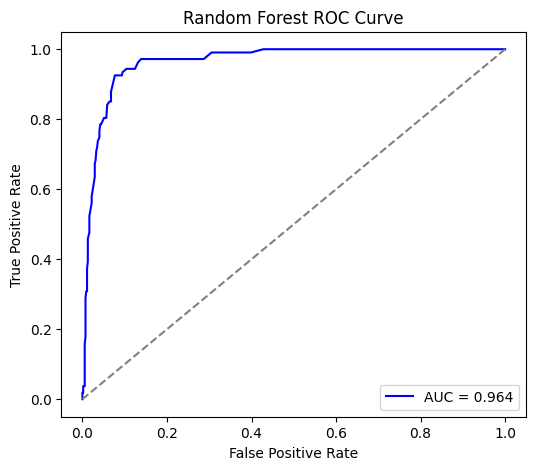

Random Forest ROC-AUC Score: 0.964


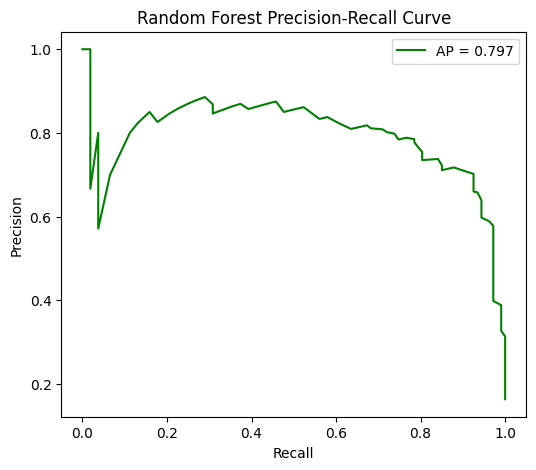

Random Forest Average Precision (AP) Score: 0.797


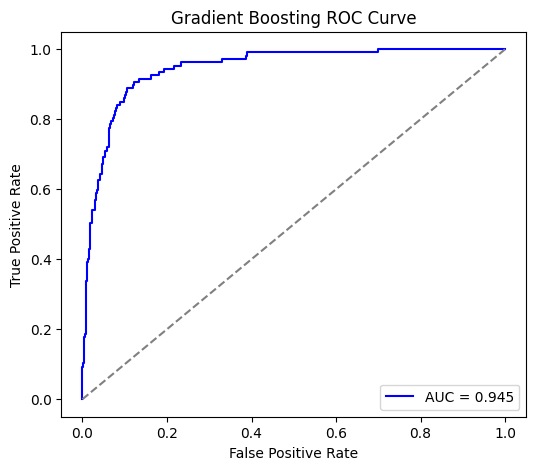

Gradient Boosting ROC-AUC Score: 0.945


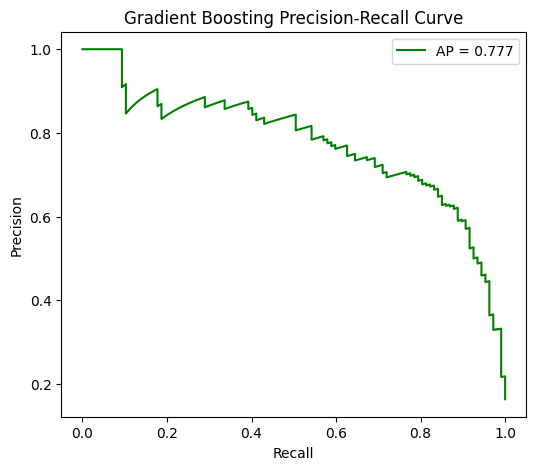

Gradient Boosting Average Precision (AP) Score: 0.777


In [51]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Models yang akan dievaluasi
models = {"Random Forest": final_model, "Gradient Boosting": best_gb}

for name, model in models.items():
    # Prediksi probabilitas class 1
    y_proba = model.predict_proba(X_test)[:,1]
    
    # --- ROC Curve & AUC ---
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', color='blue')
    plt.plot([0,1],[0,1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend()
    plt.show()
    
    print(f"{name} ROC-AUC Score: {auc_score:.3f}")
    
    # --- Precision-Recall Curve ---
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label=f'AP = {ap_score:.3f}', color='green')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{name} Precision-Recall Curve")
    plt.legend()
    plt.show()
    
    print(f"{name} Average Precision (AP) Score: {ap_score:.3f}")


**Interpretasi hasil ROC-AUC & Precission-Recall**

**Random Forest**
- **ROC-AUC = 0.964** → model hampir sempurna dalam membedakan churn vs non-churn.
- **Average Precision (AP) = 0.797** → model cukup baik dalam menangkap churners, memperhitungkan imbalance dataset.

**Gradient Boosting**
- **ROC-AUC = 0.945** → model juga sangat baik, sedikit lebih rendah dari RF.
- **AP = 0.777** → masih bagus, tapi lebih konservatif dibanding Random Forest.

**Insight**
- Random Forest tetap **model terbaik** secara keseluruhan → kombinasi F1, recall, ROC-AUC, dan AP mendukung keputusan ini.
- AP Score yang kurang dari 0.8 menunjukkan bahwa masih ada **beberapa churners yang tidak terdeteksi**, tetapi threshold tuning bisa membantu meningkatkannya.
- Gradient Boosting bisa dipakai sebagai **backup model** atau untuk ensemble jika ingin stabilitas prediksi.

---
# **Business Insight & Recommendation**
---

## ***Customer Churn Prediction – Final Model & Business Recommendation***

**Final Model Selection**

Berdasarkan evaluasi menyeluruh terhadap beberapa model klasifikasi, **Random Forest** dipilih sebagai **final model** karena menunjukkan performa terbaik secara konsisten pada metrik yang relevan untuk kasus churn prediction.

**Alasan Pemilihan Model**
- F1 Score tertinggi dibandingkan model lain
- Recall tinggi → penting untuk mendeteksi customer yang berpotensi churn
- ROC-AUC dan Average Precision paling baik
- Stabil terhadap hubungan non-linear dan interaksi antar fitur

**Threshold Tuning**

Untuk meningkatkan kemampuan menangkap churners, dilakukan **penyesuaian threshold probabilitas**.

```text
Final Model            : Random Forest
Probability Threshold  : 0.4
Tujuan                 : Meningkatkan Recall & F1 Score
```

> Penurunan threshold dari 0.5 ke 0.4 membuat model lebih sensitif terhadap customer yang berpotensi churn, yang sangat sesuai untuk strategi customer retention.

## ***Model Validation – ROC-AUC & Precision–Recall Curve***
**Tujuan Evaluasi Tambahan**

ROC-AUC dan Precision–Recall Curve digunakan untuk:
- Mengevaluasi performa model tanpa bergantung pada threshold tertentu
- Mengukur kualitas model pada data dengan class imbalance

**Hasil Evaluasi:**
| Model             | ROC-AUC   | Average Precision |
| ----------------- | --------- | ----------------- |
| Random Forest     | **0.964** | **0.797**         |
| Gradient Boosting | 0.945     | 0.777             |

**Interpretasi:**
- ROC-AUC 0.964 menunjukkan Random Forest sangat baik dalam membedakan churn dan non-churn customer
- Average Precision 0.797 menunjukkan kemampuan model dalam menangkap churners pada data tidak seimbang
- Random Forest unggul secara konsisten dan layak digunakan sebagai production-ready model

## ***Feature Importance Analysis***
Fitur-fitur yang paling berpengaruh terhadap churn berdasarkan Random Forest dan Gradient Boosting antara lain:
- Tenure
- CashbackAmount
- DaySinceLastOrder
- SatisfactionScore
- Complain
- NumberOfAddress
- PreferedOrderCat

> Fitur-fitur ini digunakan sebagai dasar dalam penyusunan rekomendasi bisnis.

## ***Business Recommendation***
| No | Business Issue                            | Customer Characteristic                              | Insight from Model                                                           | Recommended Action                                                                                                     | Expected Impact                                            |
| -- | ----------------------------------------- | ---------------------------------------------------- | ---------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------- |
| 1  | High churn risk among new customers       | Low **Tenure**                                       | Customers with shorter tenure show higher probability of churn               | • Welcome promo<br>• Early-stage loyalty program<br>• Feature usage education                                          | Increase early retention and onboarding success            |
| 2  | Inactive but high-value customers         | High **CashbackAmount** + High **DaySinceLastOrder** | Customers receive cashback but rarely place orders, indicating disengagement | • Reminder campaign<br>• Personalized promo based on **PreferedOrderCat**<br>• Limited-time voucher                    | Reactivate dormant customers and increase order frequency  |
| 3  | Poor customer experience                  | Low **SatisfactionScore** + High **Complain**        | Dissatisfied customers with unresolved complaints are more likely to churn   | • Faster complaint resolution<br>• Proactive outreach after complaint<br>• SLA monitoring for customer service         | Improve customer satisfaction and reduce churn risk        |
| 4  | Inefficient retention resource allocation | High churn probability from model output             | Churn prediction model identifies high-risk customers early                  | • Prioritize high-risk customers<br>• Optimize retention budget allocation<br>• Preventive actions before churn occurs | Higher ROI on retention programs and reduced overall churn |
